In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
# Module (b)
file_path = "/content/StudentsPerformance.csv"

# Load dataset using pandas
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# Convert DataFrame to NumPy array
data_array = df.to_numpy()
"\nNumPy Array:\n", data_array[:5] # show first 5 rows


✅ Dataset Loaded Successfully!

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


('\nNumPy Array:\n',
 array([['female', 'group B', "bachelor's degree", 'standard', 'none', 72,
         72, 74],
        ['female', 'group C', 'some college', 'standard', 'completed', 69,
         90, 88],
        ['female', 'group B', "master's degree", 'standard', 'none', 90,
         95, 93],
        ['male', 'group A', "associate's degree", 'free/reduced', 'none',
         47, 57, 44],
        ['male', 'group C', 'some college', 'standard', 'none', 76, 78,
         75]], dtype=object))

In [4]:
# Module (c)
print("Shape of dataset:", df.shape)
print("Number of dimensions:", df.ndim)
print("\nData Types:\n", df.dtypes)


Shape of dataset: (1000, 8)
Number of dimensions: 2

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [5]:
# Module (d)
# Identify missing values
print("Missing values before:\n", df.isnull().sum())

# Replace NaN with column mean using NumPy
for col in df.select_dtypes(include=[np.number]).columns:
    mean_value = np.nanmean(df[col])
    df[col] = np.where(np.isnan(df[col]), mean_value, df[col])

print("\nMissing values after replacement:\n", df.isnull().sum())


Missing values before:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Missing values after replacement:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
# Module (e)
# Using Z-score method: remove values beyond ±3 standard deviations
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    df = df[z_scores < 3]

print("\nData after removing outliers:\n", df.head())



Data after removing outliers:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0           44.0  
4                    none        76.0           78.0           75.0  


In [7]:
# Module (f)
# Normalization (Min-Max Scaling between 0 and 1)
for col in numeric_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print("\nData after normalization:\n", df.head())



Data after normalization:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none    0.641026       0.611111       0.643836  
1               completed    0.602564       0.861111       0.835616  
2                    none    0.871795       0.930556       0.904110  
3                    none    0.320513       0.402778       0.232877  
4                    none    0.692308       0.694444       0.657534  


In [8]:
# Module (h)
corr_matrix = np.corrcoef(df[numeric_cols].values.T)
print("\nCorrelation Matrix (NumPy):\n", corr_matrix)

# Optional: show labeled correlation matrix
print("\nLabeled Correlation Matrix:\n", df[numeric_cols].corr())



Correlation Matrix (NumPy):
 [[1.         0.806534   0.78997588]
 [0.806534   1.         0.95160128]
 [0.78997588 0.95160128 1.        ]]

Labeled Correlation Matrix:
                math score  reading score  writing score
math score       1.000000       0.806534       0.789976
reading score    0.806534       1.000000       0.951601
writing score    0.789976       0.951601       1.000000


In [9]:
# Module (i)
# Example: take first 5 rows and first 3 numerical columns
subset = df.iloc[:5, :3]
print("\nSubset of dataset:\n", subset)

# Example reshape (if dataset shape allows)
reshaped = df[numeric_cols].values.reshape(-1, len(numeric_cols))
print("\nReshaped numerical data shape:", reshaped.shape)



Subset of dataset:
    gender race/ethnicity parental level of education
0  female        group B           bachelor's degree
1  female        group C                some college
2  female        group B             master's degree
3    male        group A          associate's degree
4    male        group C                some college

Reshaped numerical data shape: (993, 3)


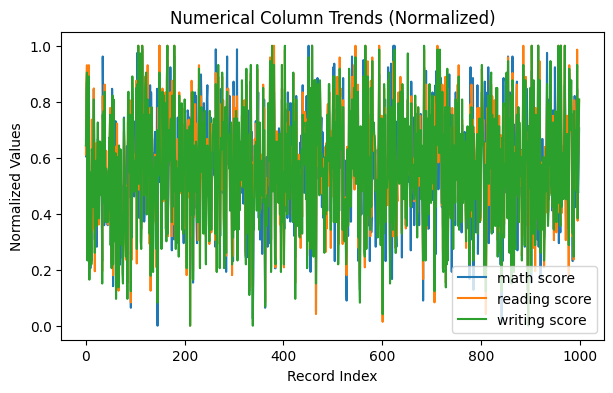

In [10]:
# Module (j)
plt.figure(figsize=(7,4))
for col in numeric_cols:
    plt.plot(df[col], label=col)
plt.title("Numerical Column Trends (Normalized)")
plt.xlabel("Record Index")
plt.ylabel("Normalized Values")
plt.legend()
plt.show()
